### 참고자료 
- https://tykimos.github.io/2017/05/22/Evaluation_Talk/

### 평가지표
#### 분류 문제
- 정확도 = 바르게 분류한 샘플 / 전체 샘플 (정확도를 평가할때에는 클래스의 분포도 꼭 확인)
- 민감도 = 판정한 것 중 실제 양성 수 / 전체 양성 수
- 특이도 = 판정한 것 중 실제 음성 수 / 전체 음성 수

#### 검출 및 검색문제
- 정밀도 = 실제 양성 수 / 양성이라고 판정한 수
- 재현율 = 검출 양성 수 / 전체 양성 수

* 검출 문제에서는 검출되지 않은 진짜 음성에 대해서는 관심이 없음

### Model evaluation
- 맞춘 개수는 다르지만 같은 평가 지수도 있고, 맞춘 개수는 같지만 평가 지수가 다른 것들이 보임
- 어떤 모델이 적합한 지는 문제에 따라 다름

### 예시 1
- 공항검색기기는 일반물건을 위험물건이라도 잘못 판정하더라도 위험물건은 반드시 찾아야함
- 즉 민감도가 높아야 함 

### 예시2
- 쇼핑 시에는 꼭 필요한 물건만 구매를 해야함
- 사야할 물건도 경우에 따라 사지 않을 수 있지만 사지 않아야 하는 물건을 반드시 안 사야함 

### 예시 3
- 지진이 나고 나면, 다음날 지진을 느낀 사람과 그렇지 않은 사람이 있을 것임
- 어떤 사람(A)은 민감해서 지진도 아닌 진동도 느끼지만 왠만한 지진은 모두 느끼는 사람이 있음 
- 반면 어떤 사람(B)은 정말 강도가 높은 지진이 아니고서야 왠만해서는 느끼지 못하는 사람이 있을수 있음
- A가 지진을 못 느꼈다고 하면, 그날은 지진이 발생하지 않은 것임, 왜냐하면 A는 민감도가 높아 왠만한 지진은 다 알아내기 때문임
- B가 지진을 느꼈다고 하면 그날은 지진이 발생한 것임, 왜냐하면 B는 특이도가 높아 지진이 발생하지 않은 것은 다 알아내기 때문임

### 예시 4
- 선생님들이 보물 10개를 숨겨두었다고 가정
- 철수는 보물을 5개가지고 왔는데, 모두 보물이었습니다. > 정밀도 100%, 재현율 50%
- 영희는 보물이라고 100개를 가지고 왔는데, 그 중 보물은 하나였습니다. > 정밀도 1%, 재현율 10%

### ROC curve
- 각 임계값별로 민감도와 특이도를 계산하여 x축을 (1-특이도), y축을 민감도로 두어서 이차원 평면 상에 점을 찍고 연결

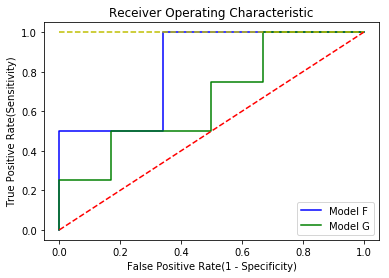

In [8]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

# 민감도
sens_F = np.array([1.0,  1.0, 1.0,  1.0, 0.75,  0.5,  0.5, 0.5, 0.5, 0.5, 0.0])

# 특이도
spec_F = np.array([0.0, 0.16, 0.5, 0.66, 0.66, 0.66, 0.83, 1.0, 1.0, 1.0, 1.0])

# 민감도
sens_G = np.array([1.0,  1.0, 0.75, 0.75, 0.5,  0.5,  0.5,  0.5, 0.25, 0.25, 0.0])

# 특이도
spec_G = np.array([0.0, 0.33, 0.33,  0.5, 0.5, 0.66, 0.66, 0.83, 0.83,  1.0, 1.0])

plt.title('Receiver Operating Characteristic')
plt.xlabel('False Positive Rate(1 - Specificity)')
plt.ylabel('True Positive Rate(Sensitivity)')

plt.plot(1-spec_F, sens_F, 'b', label = 'Model F')   
plt.plot(1-spec_G, sens_G, 'g', label = 'Model G') 
plt.plot([0,1],[1,1],'y--')
plt.plot([0,1],[0,1],'r--')

plt.legend(loc='lower right')
plt.show()

### Precision-Recall Curve

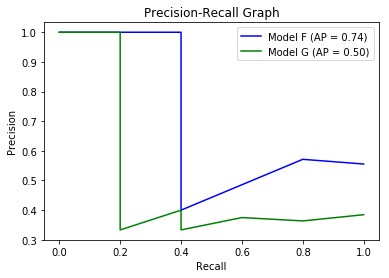

In [10]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve, average_precision_score

class_F = np.array([0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1])
proba_F = np.array([0.05, 0.05, 0.15, 0.15, 0.25, 0.25, 0.35, 0.35, 0.45, 0.45, 0.55, 0.55, 0.65, 0.85, 0.95])

class_G = np.array([0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1])
proba_G = np.array([0.05, 0.05, 0.15, 0.15, 0.25, 0.25, 0.25, 0.35, 0.35, 0.45, 0.55, 0.55, 0.65, 0.75, 0.95])

precision_F, recall_F, _ = precision_recall_curve(class_F, proba_F)
precision_G, recall_G, _ = precision_recall_curve(class_G, proba_G)

ap_F = average_precision_score(class_F, proba_F)
ap_G = average_precision_score(class_G, proba_G)

plt.title('Precision-Recall Graph')
plt.xlabel('Recall')
plt.ylabel('Precision')

plt.plot(recall_F, precision_F, 'b', label = 'Model F (AP = %0.2F)'%ap_F)   
plt.plot(recall_G, precision_G, 'g', label = 'Model G (AP = %0.2F)'%ap_G)  

plt.legend(loc='upper right')
plt.show()